# Computer Project #2: Building a Simple Climate model
This notebook is partially based on the MIT Course in Computational Thinking: https://computationalthinking.mit.edu/Spring21/our_first_climate_model/

In this computer class, we will put our knowledge of the incoming radiation into a computer model to build a very simple climate model. 

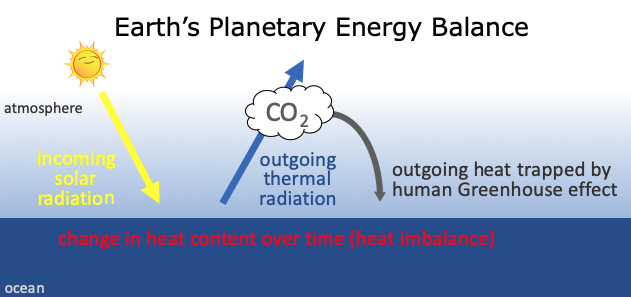

We will start with the same heat equation that we used in the Soil Model, so that we can again solve the following equation:
$c \frac{dT}{dt} = I_{In} - I_{Out} + GHG_{Hum}$

With on the right hand side the incoming radiation from the Sun $I_{In}$, the outgoing infrared radiation $I_{Out}$ *including feedbacks such as water vapor*, and  $GHG$ that represents the effect of the change in green house gases. 
On the left hand side, the change in heat content over time is determined by the temperature  (in Kelvin) and the heat capacity of the climate system. While we are interested in the temperature of the atmosphere, which has a very small heat capacity, its heat is closely coupled with that of the upper ocean, which has a much larger heat capacity, so that's the value we'll use.



## 1.1 Incoming Solar Radiation
As we discussed in class, the solar heatflux is equal to:
$\frac{S}{4} (1-\alpha) = 240 W/m^2$.
With $C = 51 J/m^2/K$, and a starting temperature of $14C = 288K$, we can plug a similar version of our Soil model, and see what happens:


In [2]:
#First, load the modules to do the calculations. Just press shift+enter
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Now create the functions. You can press shift+enter, but be sure to compare this block with the equations above
def calc_temp_diff(Told, j, c, dt):
    Tdiff = 1/( c) * j * dt
    return Tdiff


Text(0, 0.5, 'Temperature (C)')

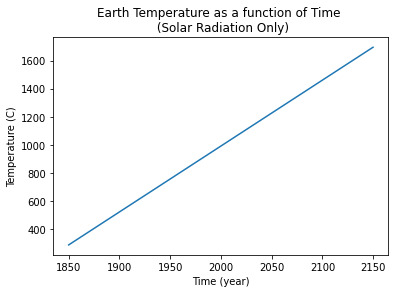

In [4]:
S         = 1368           # Incoming Solar Radiation
albedo    = 0.3            # Planetary Albedo
j         = S*(1-albedo)/4  # We're heating up the soil with 300W/m2
temp_init = 273 + 14       # We start with a temperature of 14C everywhere in the layer.
c         = 51             # The Heat capacity of the Atmosphere/Ocean

#To do the calculations, we create an array with temperatures as a function of depth and time.  You shouldn't need to change anything here
time      = np.arange(1850, 2150 ,0.1)   #300 years, in steps of 0.1 year
temp      = temp_init * np.ones((time.size))

#Now we step through the time series to calculate each temperature, using a "for loop".
for t in range(1, time.size):
    dt      = time[t] - time[t-1]
    temp[t] = temp[t-1] + calc_temp_diff(temp[t-1], j, c, dt)

plt.plot(time, temp)
plt.title('Earth Temperature as a function of Time \n (Solar Radiation Only)')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (C)')

## QUESTION: What would be the temperature in 2022 if there would be no outgoing radiation? 

## 1.2 Outgoing thermal radiation
The outgoing thermal radiation term $I_{out}$  (or "blackbody cooling to space") represents the combined effects of negative feedbacks that dampen warming, such as blackbody radiation, and positive feedbacks that amplify warming, such as the water vapor feedback.
To deal with these complications, we first assume that the preindustrial world was in energy balance:

$\frac{dT}{dt} = 0 = I_{In} - I_{Out}$, so:

$I_{In} = I_{Out}$

In class, we discussed that the temperature of a Black body is equal to $I=\sigma T^4$, with $\sigma = 5.67 \cdot 10^{-8}$. We also know that this ignores the natural green house effect of the atmosphere. To include that effect, we use an amplification factor $A$:

$A I_{In} = \sigma T^4$.

## QUESTION: Calculate the value for this amplification factor A to reach an equilibrium temperature of 14C

In [10]:
A = 1.6

## QUESTION: Venus has a strong greenhouse effect. Given the data that you can find here: https://en.wikipedia.org/wiki/Venus what is the amplification factor on Venus?

Since these physics are too complicated to deal with here, we *linearize* here how our model would respond to changes.

We assume that the preindustrial world was in energy balance, and thus the equilibrium temperature is the preindustrial temperature. In other words, if $T=T_0$, no change will happen (the slope is zero); if $T \neq T_0$ the slope is such that it drives back the temperature to $T_0$. The further away from $T_0$ we are, the larger the force driving back.

Thus we assume

$C \frac{dT(t)}{dt} = B(T_0 - T(t)) = B(\left( \frac{A I_{In}}{\sigma}\right)^{1/4} - T(t)) $ for some value of $B$. The minus sign in front of $T(t)$ indicating it restores equilibrium.

We choose a value of $B=1.3$. The bigger this value is, the faster temperature goes to it's equilibrium. We can play with this value of $B$ to create a more accurate climate model

Inspect the code below, and fill out a value for A, B, and a temperature change (e.g., $6K$) to see how it bounces back.

In [6]:
def calc_thermal_radiation(Told, A, Iin, sigma, B, c, dt):
    Tdiff = B / c * ((A*Iin/sigma)**.25 - Told) * dt
    return Tdiff


Text(0, 0.5, 'Temperature (K)')

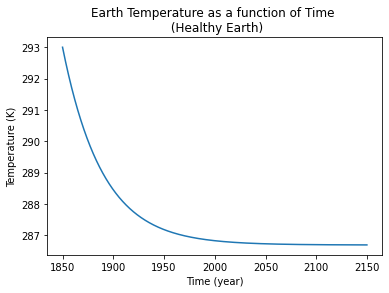

In [14]:
A           = 1.6              # Fill this one out from what you calculated above
B           = 1.3

S           = 1368           # Incoming Solar Radiation
albedo      = 0.3            # Planetary Albedo
j           = S*(1-albedo)/4  # We're heating up the soil with 300W/m2
sigma       = 5.67E-8
temp_init   = 273 + 14       # We start with a temperature of 14C everywhere in the layer.
temp_change = 6
c           =  51             # The Heat capacity of the Atmosphere/Ocean

#To do the calculations, we create an array with temperatures as a function of depth and time.  You shouldn't need to change anything here
time      = np.arange(1850, 2150 ,0.1)   #300 years, in steps of 0.1 year
temp      = temp_init * np.ones((time.size)) + temp_change

#Now we step through the time series to calculate each temperature, using a "for loop".
for t in range(1, time.size):
    dt      = time[t] - time[t-1]
    temp[t] = temp[t-1] +  calc_thermal_radiation(temp[t-1], A, j, sigma, B, c, dt)

plt.plot(time, temp)
plt.title('Earth Temperature as a function of Time \n (Healthy Earth)')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')

## QUESTION: Suppose that due to global warming, the equilibrium temperature has changed with 3C. How long does it take to get to that new temperature?

## Human-caused greenhouse effect
Empirically, the greenhouse effect is known to be a logarithmic function of gaseous carbon dioxide (CO₂) concentrations:
    
$C_{CO2} * \ln \frac{CO_2}{CO_{2, PreIndustrial}}$

With $C_{CO2}$ again some kind of coefficient; we set it to $5.0$ for now. The preindustrial $CO_2$ concentration is $280 ppm$.


In [15]:
def calc_greenhouse(CO2, CO2_0, Coeff, c, dt):
    forcing = Coeff * np.log(CO2/CO2_0) * dt/c
    return forcing
    

Text(0, 0.5, 'Temperature (K)')

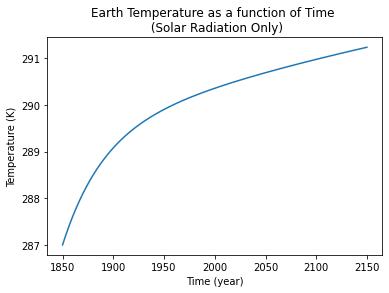

In [19]:
CO2_0 = 280
CO2 = 280 + (480-280)/(2020-1850) * time - 1850

C_CO2 = 5.0


S           = 1368           # Incoming Solar Radiation
albedo      = 0.3            # Planetary Albedo
j           = S*(1-albedo)/4  # We're heating up the soil with 300W/m2
sigma       = 5.67E-8
temp_init   = 273 + 14       # We start with a temperature of 14C everywhere in the layer.
c           =  51             # The Heat capacity of the Atmosphere/Ocean

#To do the calculations, we create an array with temperatures as a function of depth and time.  You shouldn't need to change anything here
time      = np.arange(1850, 2150 ,0.1)   #300 years, in steps of 0.1 year
temp      = temp_init * np.ones((time.size))

#Now we step through the time series to calculate each temperature, using a "for loop".
for t in range(1, time.size):
    dt      = time[t] - time[t-1]
    temp[t] = temp[t-1] +  calc_thermal_radiation(temp[t-1], A, j, sigma, B, c, dt) + calc_greenhouse(CO2[t], CO2_0, C_CO2, c, dt)
        

plt.plot(time, temp)
plt.title('Earth Temperature as a function of Time \n (Solar Radiation Only)')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')

## QUESTION: What is the temperature increase due to a warming climate in the following situations:
1. With a $CO_2$ concentration like we have today (480ppm)
2. With a concentration that keeps increasing linearly from 280ppm in 1850 to 480ppm in 2020
3. With a realistic business-as-usual scenario, where the concentration is equal to $280 * (1+ ((t-1850)/220)^3)$ (Hint: in Python you use a double star (**) to take the power.

To do so, copy paste the code from above, and change the numbers accordingly. Comment both how realistic the temperatures look, and how long it takes to get to an equilibrium.


## Snowball Earth
While oceans are dark and absorbant, $\alpha_{ocean} \approx 0.05$, ice and snow are bright and reflective: $\alpha_{ice} \approx 0.5$ to $0.9$. Thus, if much of the ocean's surface freezes over, we expect Earth's albedo to rise dramatically, causing more sunlight to be reflected to space, which in turn causes even more cooling and more of the ocean to freeze, etc. This non-linear positive feedback effect is referred to as the ice-albedo feedback (see illustration below).

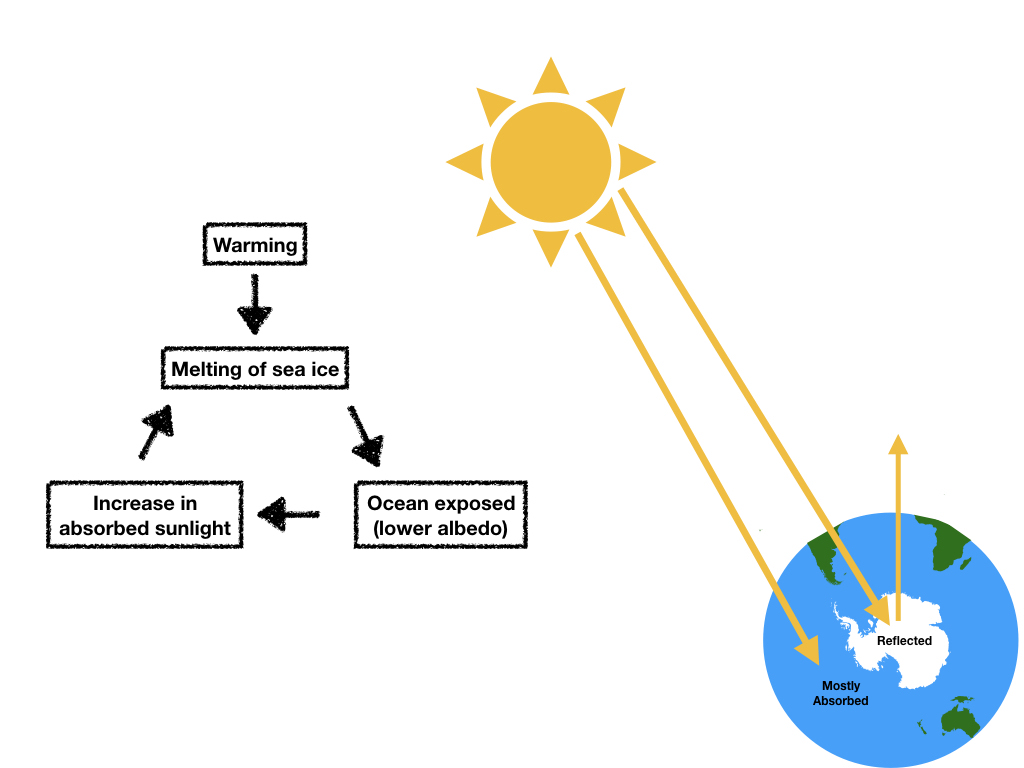

We can represent the ice-albedo feedback crudely in our energy balance model by allowing the albedo to depend on temperature:

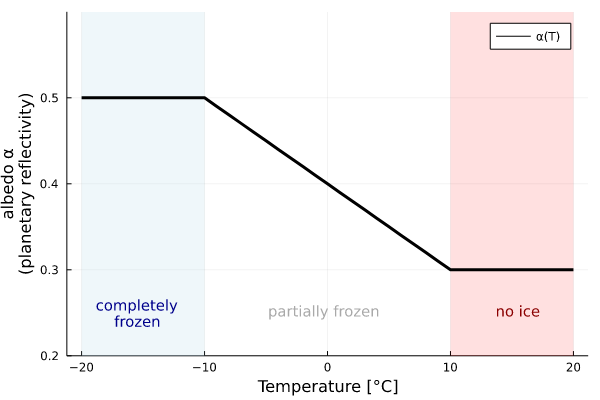

To implement this in our climate model, we will need to capture this in a function.

In [48]:
def calc_albedo(T):
    T = T - 273
    if ( T < -10 ):
        albedo = 0.5
    elif (T> 10 ):
        albedo = 0.3
    else:
        albedo = 0.5 - 0.2 * (T+10)/20
    return albedo

Text(0, 0.5, 'Temperature (K)')

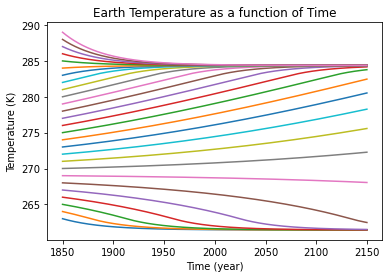

In [58]:
CO2_0 = 280
CO2 = 280 * np.ones((time.size)) #Start this with Pre-industrial CO2

C_CO2 = 5.0

S           = 1300           # Incoming Solar Radiation
temp_init   = 273 + -10       # We start with a temperature of 14C everywhere in the layer.
c           = 51             # The Heat capacity of the Atmosphere/Ocean

#To do the calculations, we create an array with temperatures as a function of depth and time.  You shouldn't need to change anything here
time      = np.arange(1850, 2150 ,0.1)   #300 years, in steps of 0.1 year

for temp_init in np.arange(263,290,1): #We're making a plot for every starting temperature
    temp      = temp_init * np.ones((time.size))
    for t in range(1, time.size):
        dt     = time[t] - time[t-1]
        albedo = calc_albedo(temp[t-1])
        j      = S*(1-albedo)/4  # The incoming solar heat flux

        temp[t] = temp[t-1] +  calc_thermal_radiation(temp[t-1], A, j, sigma, B, c, dt) + calc_greenhouse(CO2[t], CO2_0, C_CO2, c, dt)


    plt.plot(time, temp)


plt.title('Earth Temperature as a function of Time')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')



## QUESTION: No matter with what temperature you start, there are only 2 final temperatures possible. What are these temperatures? What is cut-off temperature at which you switch between either equilibrium temperature?

To unfreeze the world after a Snowball Earth, there are two options: Either a warmer Sun, or an increase in CO2 conncentration due to volcanic activity.

First, we're going to scan through different Solar Constants to see when temperature starts to rise

Text(0, 0.5, 'Temperature (K)')

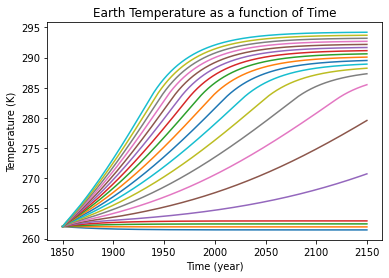

In [64]:
CO2_0 = 280
CO2 = 280 * np.ones((time.size)) #Start this with Pre-industrial CO2

C_CO2 = 5.0

S           = 1300           # Incoming Solar Radiation
temp_init   = 262       # We start with a Snowball Earth.
c           = 51             # The Heat capacity of the Atmosphere/Ocean

#To do the calculations, we create an array with temperatures as a function of depth and time.  You shouldn't need to change anything here
time      = np.arange(1850, 2150 ,0.1)   #300 years, in steps of 0.1 year

for S in np.arange(1300,1500,10): #We're making a plot for every starting Solar Constant
    temp      = temp_init * np.ones((time.size))
    for t in range(1, time.size):
        dt     = time[t] - time[t-1]
        albedo = calc_albedo(temp[t-1])
        j      = S*(1-albedo)/4  # The incoming solar heat flux

        temp[t] = temp[t-1] +  calc_thermal_radiation(temp[t-1], A, j, sigma, B, c, dt) + calc_greenhouse(CO2[t], CO2_0, C_CO2, c, dt)


    plt.plot(time, temp)


plt.title('Earth Temperature as a function of Time')
plt.xlabel('Time (year)')
plt.ylabel('Temperature (K)')


## QUESTION: What is the Solar Constant to start melting the Snowball Earth?

QUESTION: Similar to the Solar Constant, scan through $CO_2$ values to find the concentration at which ice begins to melt 